<a href="https://colab.research.google.com/github/mohantvss/Lead_Score/blob/master/Lead_Score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Lead Score - Case Study**

**Problem Statement**

An X Education need help to select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires us to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

### Data load and perform data cleaning

In [453]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [454]:
df = pd.read_csv('/content/Leads.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [455]:
# provides dtypes and non-null count
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [456]:
# finding out null values percentages in the dataset
(df.isnull().sum().sort_values(ascending=False)/len(df))*100

,0
Lead Quality,51.590909
Asymmetrique Activity Index,45.649351
Asymmetrique Profile Score,45.649351
Asymmetrique Activity Score,45.649351
Asymmetrique Profile Index,45.649351
Tags,36.287879
Lead Profile,29.318182
What matters most to you in choosing a course,29.318182
What is your current occupation,29.112554
Country,26.634199


In [457]:
df.shape

(9240, 37)

In [458]:
# treating columns which has more than 35% missing values
colums_missing =[]

for i in df.columns:
  if (df[i].isnull().mean())*100 > 35:
    colums_missing.append(i)

df = df.drop(colums_missing, axis=1)


In [459]:
df.shape

(9240, 31)

In [460]:
df.nunique()

,0
Prospect ID,9240
Lead Number,9240
Lead Origin,5
Lead Source,21
Do Not Email,2
Do Not Call,2
Converted,2
TotalVisits,41
Total Time Spent on Website,1731
Page Views Per Visit,114


In [461]:
df = df.drop(['Magazine','Receive More Updates About Our Courses',
              'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'],axis=1)

In [462]:
df.shape

(9240, 26)

In [463]:
## treat TotalVisits & Page Views Per Visit blanks values with 0

df['Page Views Per Visit'] = df['Page Views Per Visit'].fillna(0)
df['TotalVisits'] = df['TotalVisits'].fillna(0)

In [464]:
# treating columns which has more than 1% missing values

colums_missing =[]

for i in df.columns:
  if (df[i].isnull().mean())*100 > 1:
    colums_missing.append(i)

colums_missing


['Last Activity',
 'Country',
 'Specialization',
 'How did you hear about X Education',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Lead Profile',
 'City']

In [465]:
df[colums_missing] =df[colums_missing].replace('Select', 'not provided')

In [466]:
df[colums_missing] =df[colums_missing].replace(np.nan, 'not provided')

In [467]:
# finding out null values percentages in the dataset
(df.isnull().sum().sort_values(ascending=False)/len(df))*100

,0
Lead Source,0.38961
Prospect ID,0.00000
What is your current occupation,0.00000
A free copy of Mastering The Interview,0.00000
City,0.00000
Lead Profile,0.00000
Through Recommendations,0.00000
Digital Advertisement,0.00000
Newspaper,0.00000
X Education Forums,0.00000


In [468]:
df['Lead Source'] =df['Lead Source'].replace(np.nan, 'Unknown')


In [469]:
df['Lead Source'].value_counts()

,count
Lead Source,
Google,2868
Direct Traffic,2543
Olark Chat,1755
Organic Search,1154
Reference,534
Welingak Website,142
Referral Sites,125
Facebook,55
Unknown,36


In [470]:
## replacing google in to Google to make date more consistent
df['Lead Source'] =df['Lead Source'].replace('google', 'Google')

In [471]:
# float_columns = df.select_dtypes(include='float').columns.tolist()
# num_columns = df.select_dtypes(exclude='object').columns
num_columns_1 = df.select_dtypes(exclude='object').columns.tolist()
# num_columns
num_columns_1

['Lead Number',
 'Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit']

In [472]:
cat_columns = df.select_dtypes(include='object').columns.tolist()
cat_columns

['Prospect ID',
 'Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'Country',
 'Specialization',
 'How did you hear about X Education',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Search',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Lead Profile',
 'City',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [473]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 26 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9240 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9240 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9240 

In [474]:
#checkig outliers in the system
outlier = df[num_columns_1]
outlier.describe(percentiles=[.25,.5,.75,.9,.95,0.99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,617188.435606,0.385390,3.394156,487.698268,2.327787
std,23405.995698,0.486714,4.836682,548.021466,2.164258
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,0.000000,12.000000,0.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000
90%,650506.100000,1.000000,7.000000,1380.000000,5.000000
95%,655404.050000,1.000000,10.000000,1562.000000,6.000000
99%,659592.980000,1.000000,17.000000,1840.610000,9.000000


In [475]:
df['Country'].value_counts()

,count
Country,
India,6492
not provided,2461
United States,69
United Arab Emirates,53
Singapore,24
Saudi Arabia,21
United Kingdom,15
Australia,13
Qatar,10


In [476]:
def country(x):
    category = ""
    if x == "india":
        category = "india"
    elif x == "not provided":
        category = "not provided"
    else:
        category = "outside india"
    return category

df['Country'] = df.apply(lambda x:country(x['Country']), axis = 1)
df['Country'].value_counts()

,count
Country,
outside india,6779
not provided,2461


In [477]:
df['City'].value_counts()

,count
City,
not provided,3669
Mumbai,3222
Thane & Outskirts,752
Other Cities,686
Other Cities of Maharashtra,457
Other Metro Cities,380
Tier II Cities,74


In [478]:
# Dropping city columns to simply solution
df = df.drop('City', axis=1)

In [479]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 25 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9240 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9240 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9240 

In [480]:
# Removing lead number and Prospect ID as these fields doesn't add any value to model
df = df.drop(['Lead Number','Prospect ID'],axis=1 )

In [481]:
# Deleting columns that doesn't provide information

# df = df.drop(['Do Not Email', 'Do Not Call','Receive More Updates About Our Courses','City','I agree to pay the amount through cheque',
              # 'A free copy of Mastering The Interview','Update me on Supply Chain Content', 'Get updates on DM Content',
              # 'Tags','Last Notable Activity'], axis=1)

### EDA activities

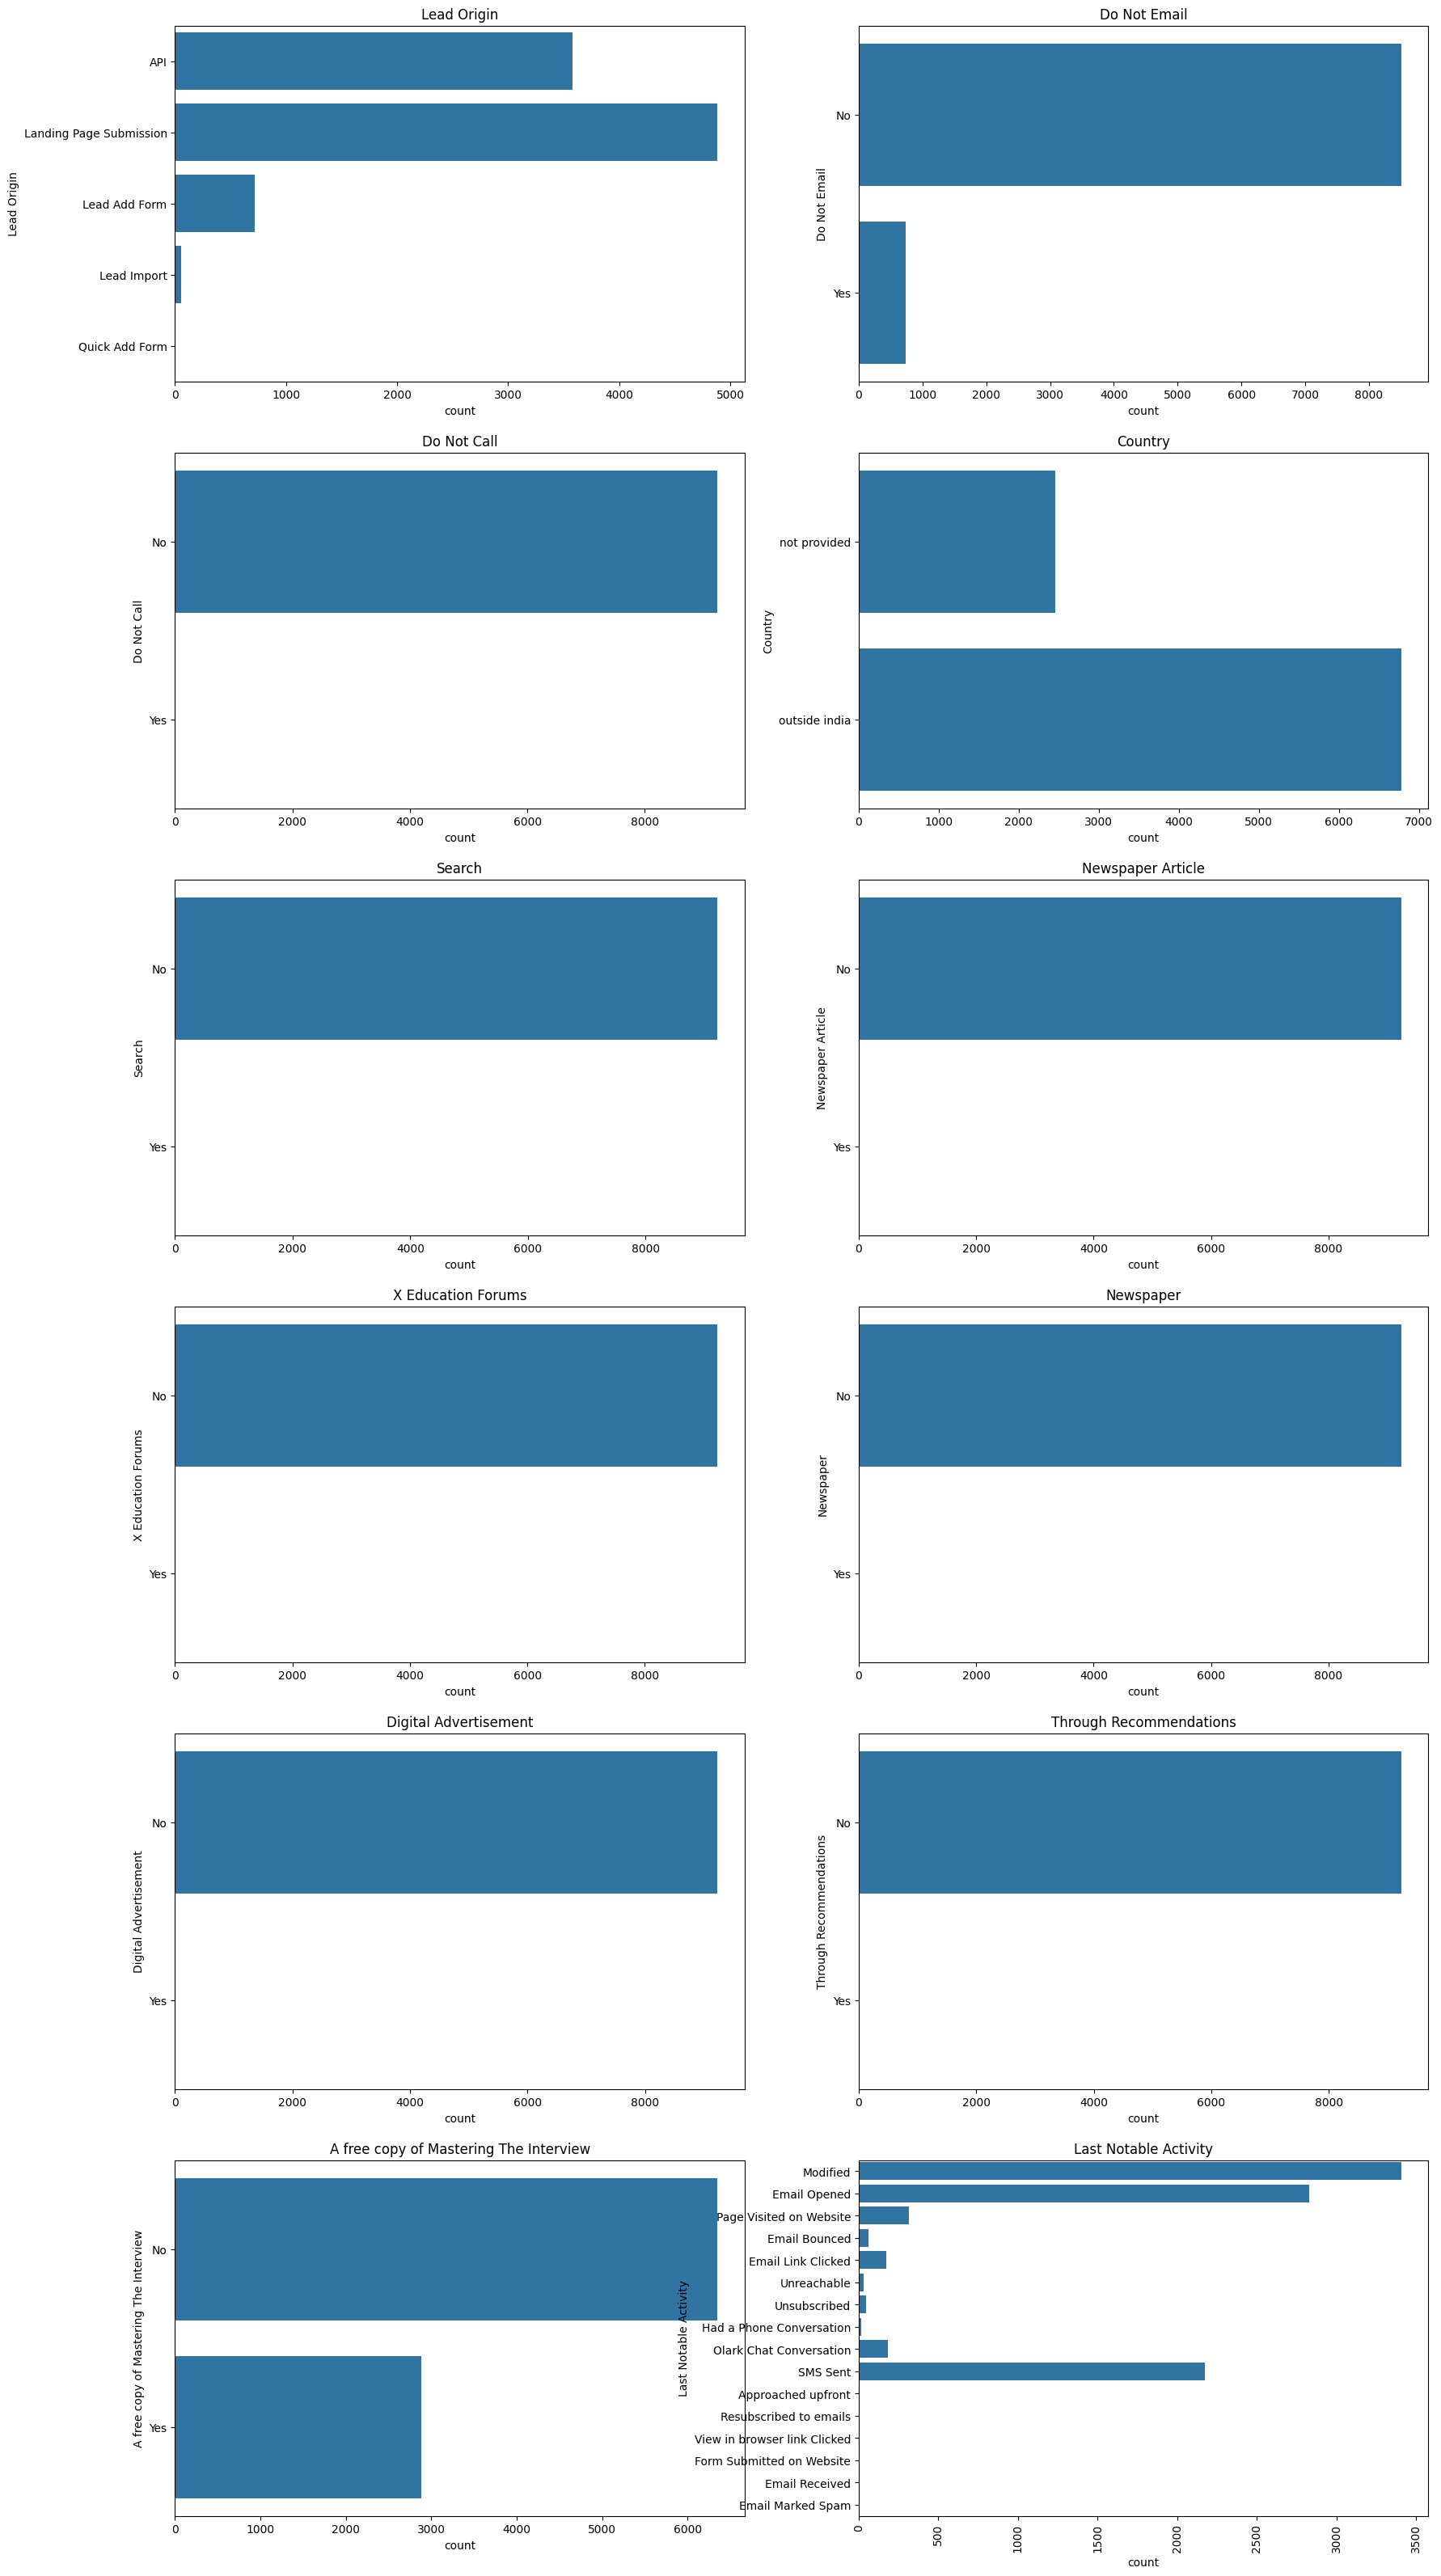

In [443]:
plt.figure(figsize = (20,40))

plt.subplot(6,2,1)
sns.countplot(df['Lead Origin'])
plt.title('Lead Origin')

plt.subplot(6,2,2)
sns.countplot(df['Do Not Email'])
plt.title('Do Not Email')

plt.subplot(6,2,3)
sns.countplot(df['Do Not Call'])
plt.title('Do Not Call')

plt.subplot(6,2,4)
sns.countplot(df['Country'])
plt.title('Country')

plt.subplot(6,2,5)
sns.countplot(df['Search'])
plt.title('Search')

plt.subplot(6,2,6)
sns.countplot(df['Newspaper Article'])
plt.title('Newspaper Article')

plt.subplot(6,2,7)
sns.countplot(df['X Education Forums'])
plt.title('X Education Forums')

plt.subplot(6,2,8)
sns.countplot(df['Newspaper'])
plt.title('Newspaper')

plt.subplot(6,2,9)
sns.countplot(df['Digital Advertisement'])
plt.title('Digital Advertisement')

plt.subplot(6,2,10)
sns.countplot(df['Through Recommendations'])
plt.title('Through Recommendations')

plt.subplot(6,2,11)
sns.countplot(df['A free copy of Mastering The Interview'])
plt.title('A free copy of Mastering The Interview')

plt.subplot(6,2,12)
sns.countplot(df['Last Notable Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')

plt.show()


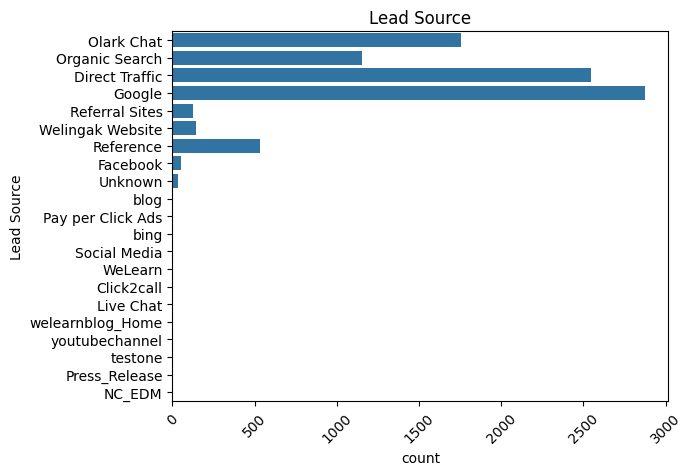

In [444]:
sns.countplot(df, y='Lead Source')
plt.title('Lead Source')
plt.xticks(rotation=45)
plt.show()

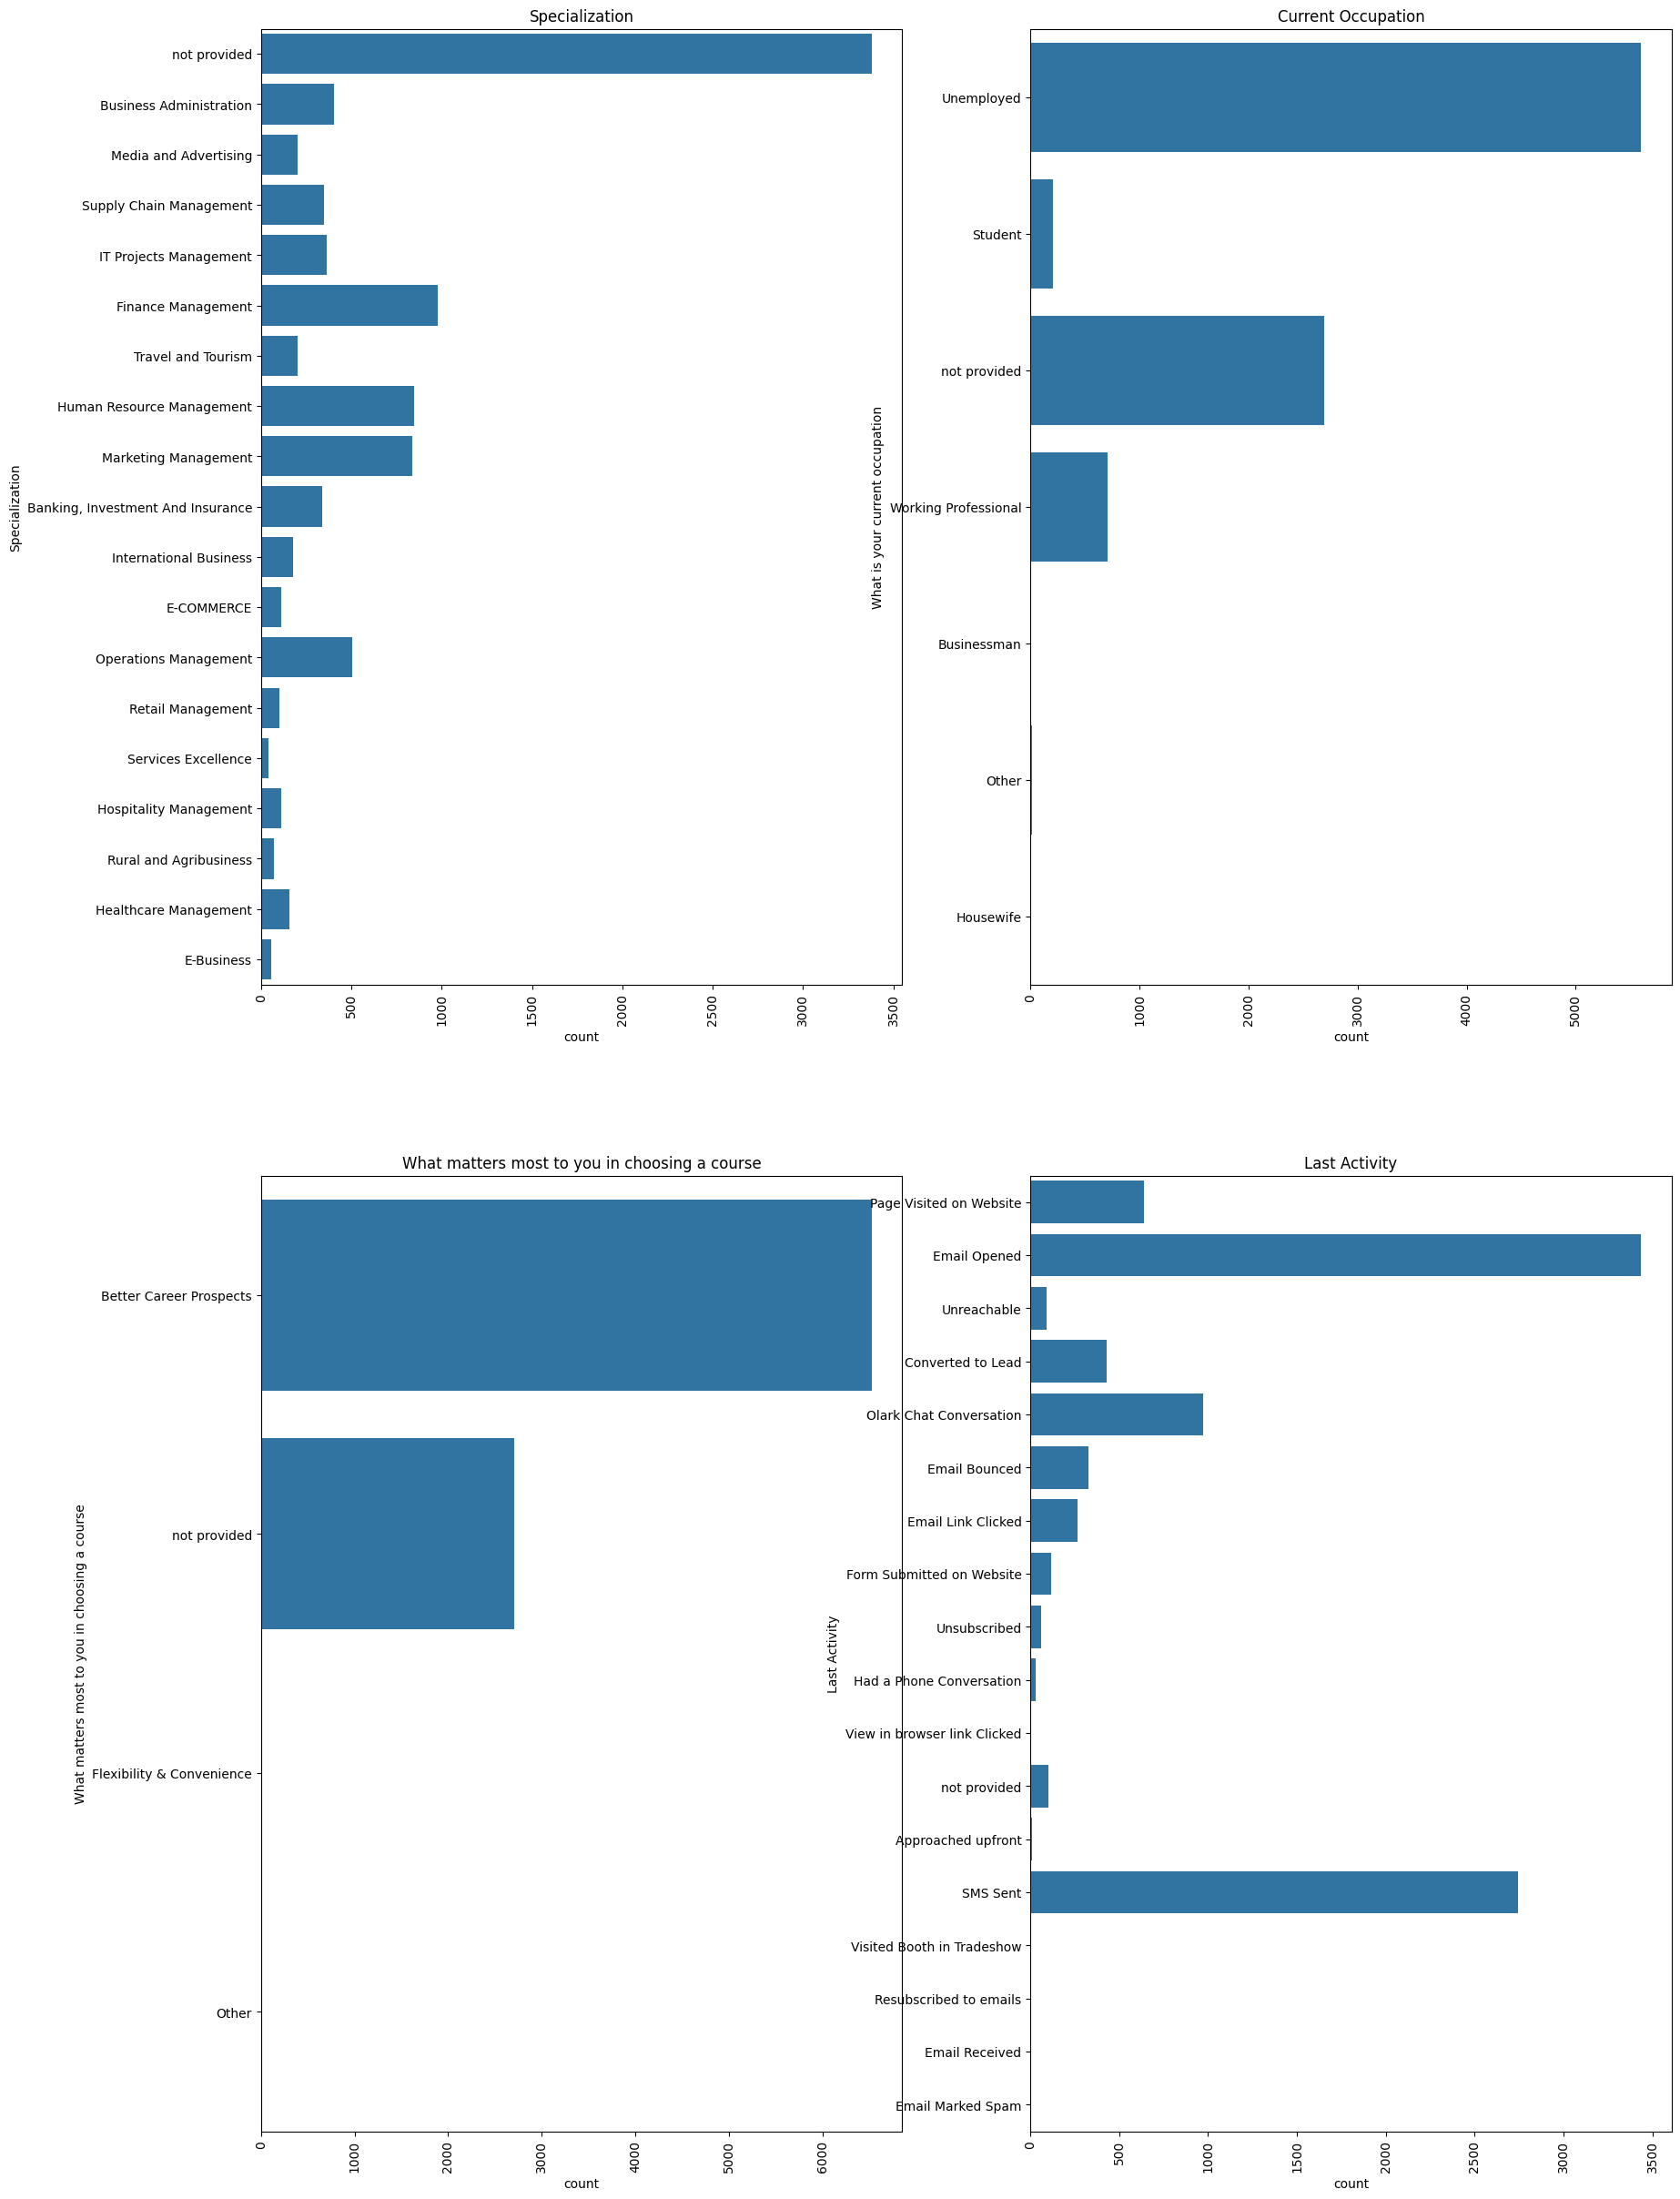

In [445]:
plt.figure(figsize = (20,30))
plt.subplot(2,2,1)
sns.countplot(df['Specialization']).tick_params(axis='x', rotation = 90)
plt.title('Specialization')
plt.subplot(2,2,2)
sns.countplot(df['What is your current occupation']).tick_params(axis='x', rotation = 90)
plt.title('Current Occupation')
plt.subplot(2,2,3)
sns.countplot(df['What matters most to you in choosing a course']).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')
plt.subplot(2,2,4)
sns.countplot(df['Last Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')
plt.show()

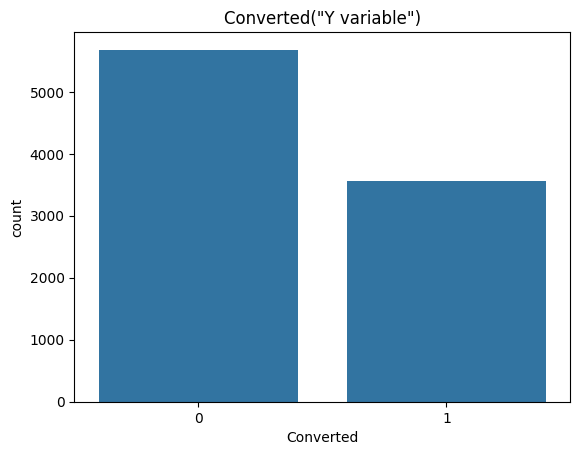

In [449]:
sns.countplot(df, x= 'Converted')
plt.title('Converted("Y variable")')
plt.show()

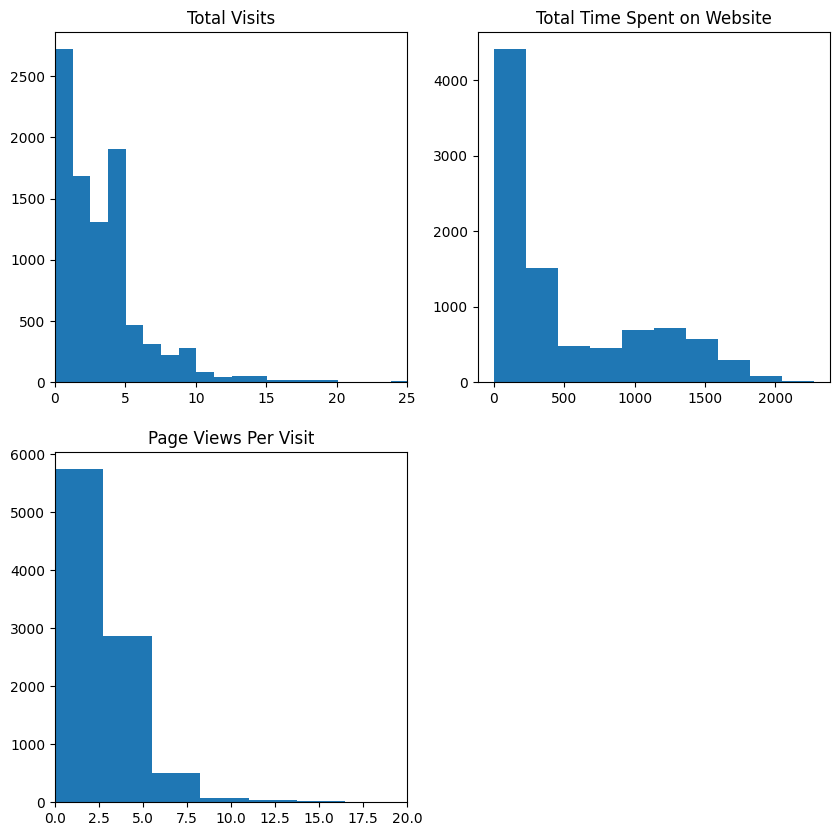

In [447]:
plt.figure(figsize = (10,10))
plt.subplot(221)
plt.hist(df['TotalVisits'], bins = 200)
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(222)
plt.hist(df['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website')

plt.subplot(223)
plt.hist(df['Page Views Per Visit'], bins = 20)
plt.title('Page Views Per Visit')
plt.xlim(0,20)
plt.show()

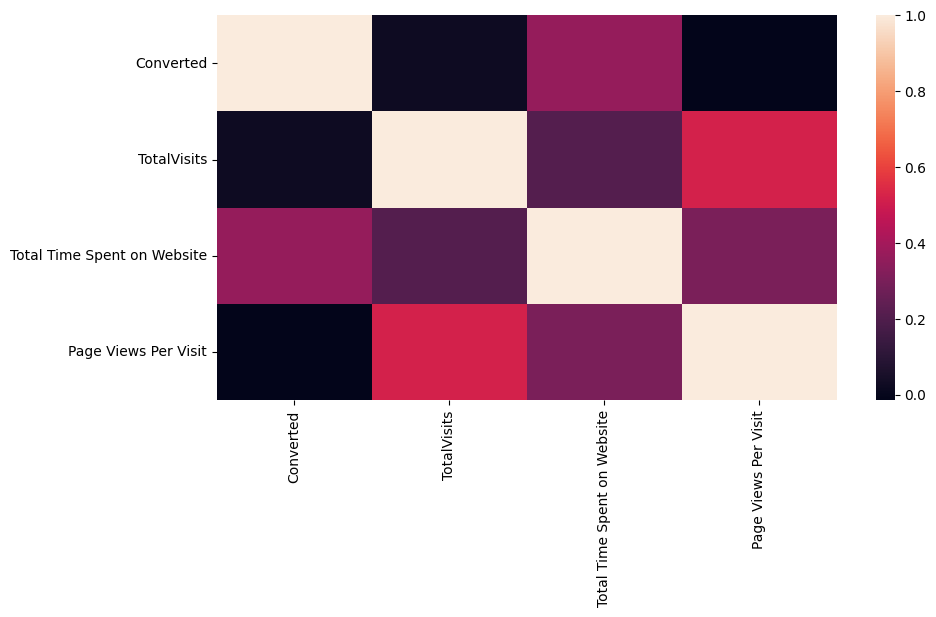

In [483]:
# To check the correlation among varibles
num_columns_2 = df.select_dtypes(exclude='object').columns.tolist()
plt.figure(figsize=(10,5))
sns.heatmap(df[num_columns_2].corr())
plt.show()

### Creating dummy variables for categorical variables

In [484]:
varlist = ['Do Not Email', 'Do Not Call', 'Search','Newspaper Article', 'X Education Forums',
           'Newspaper', 'Digital Advertisement', 'Through Recommendations',]


In [485]:
def change_map(x):
  return x.map({"Yes":1, "No":0})

df[varlist] = df[varlist].apply(change_map)

In [486]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Lead Profile,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,not provided,...,Better Career Prospects,0,0,0,0,0,0,not provided,No,Modified
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,outside india,...,Better Career Prospects,0,0,0,0,0,0,not provided,No,Email Opened
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,outside india,...,Better Career Prospects,0,0,0,0,0,0,Potential Lead,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,outside india,...,Better Career Prospects,0,0,0,0,0,0,not provided,No,Modified
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,outside india,...,Better Career Prospects,0,0,0,0,0,0,not provided,No,Modified


In [487]:
dummy_var = ['Lead Origin', 'Lead Source','Last Activity', 'Country',
             'Specialization', 'How did you hear about X Education', 'What is your current occupation', 'A free copy of Mastering The Interview',
             'What matters most to you in choosing a course',  'Lead Profile', 'Last Notable Activity']

In [488]:
df[dummy_var].head()

,Lead Origin,Lead Source,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,A free copy of Mastering The Interview,What matters most to you in choosing a course,Lead Profile,Last Notable Activity
0,API,Olark Chat,Page Visited on Website,not provided,not provided,not provided,Unemployed,No,Better Career Prospects,not provided,Modified
1,API,Organic Search,Email Opened,outside india,not provided,not provided,Unemployed,No,Better Career Prospects,not provided,Email Opened
2,Landing Page Submission,Direct Traffic,Email Opened,outside india,Business Administration,not provided,Student,Yes,Better Career Prospects,Potential Lead,Email Opened
3,Landing Page Submission,Direct Traffic,Unreachable,outside india,Media and Advertising,Word Of Mouth,Unemployed,No,Better Career Prospects,not provided,Modified
4,Landing Page Submission,Google,Converted to Lead,outside india,not provided,Other,Unemployed,No,Better Career Prospects,not provided,Modified


In [489]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
pd_dum = pd.get_dummies(df[dummy_var], drop_first=True)
pd_dum = pd_dum.astype(dtype="int")
pd_dum.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [490]:
pd_dum.shape

(9240, 99)

In [491]:
df = pd.concat([df,pd_dum], axis=1)
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,not provided,...,0,0,1,0,0,0,0,0,0,0
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,outside india,...,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,outside india,...,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,outside india,...,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,outside india,...,0,0,1,0,0,0,0,0,0,0


In [492]:
df.shape

(9240, 122)

In [493]:
# df[['TotalVisits','Total Time Spent on Website']] = pd.to_numeric(df[['TotalVisits','Total Time Spent on Website']])

# df['TotalVisits'] = pd.to_numeric(df['TotalVisits'],errors='coerce')

df['TotalVisits'] = df['TotalVisits'].astype(int)

# df['Total Time Spent on Website'] = pd.to_numeric(df['Total Time Spent on Website'],errors='coerce')

df['Total Time Spent on Website'] = df['Total Time Spent on Website'].astype(int)


In [494]:
df['TotalVisits'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 9240 entries, 0 to 9239
Series name: TotalVisits
Non-Null Count  Dtype
--------------  -----
9240 non-null   int64
dtypes: int64(1)
memory usage: 72.3 KB


In [495]:
df= df.drop(dummy_var,axis=1)

### Train & Test Split and Transform continous variables

In [496]:
## importing train_test_split funtion to divide data train and test
from sklearn.model_selection import train_test_split

In [497]:
y = df['Converted']
X = df.drop('Converted',axis=1)

In [498]:
# Divided train and test data in to  80 and 20
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size =.7, test_size=.3, random_state=100)

In [499]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()

In [500]:
X_train[['TotalVisits','Total Time Spent on Website', 'Page Views Per Visit']]  = scalar.fit_transform(X_train[['TotalVisits','Total Time Spent on Website', 'Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1871,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6795,0,0,0.015936,0.214349,0.024182,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3516,0,0,0.019920,0.046655,0.045455,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8105,0,0,0.019920,0.541373,0.090909,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3934,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


### Feature Selection using RFE

In [505]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [506]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [507]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))
# rfe.support_
# print(rfe.ranking_)

[('Do Not Email', True, 1),
 ('Do Not Call', False, 39),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 14),
 ('Search', False, 47),
 ('Newspaper Article', False, 28),
 ('X Education Forums', False, 66),
 ('Newspaper', False, 23),
 ('Digital Advertisement', False, 27),
 ('Through Recommendations', False, 25),
 ('Lead Origin_Landing Page Submission', False, 9),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 35),
 ('Lead Origin_Quick Add Form', False, 78),
 ('Lead Source_Direct Traffic', False, 41),
 ('Lead Source_Facebook', False, 5),
 ('Lead Source_Google', False, 44),
 ('Lead Source_Live Chat', False, 57),
 ('Lead Source_NC_EDM', False, 16),
 ('Lead Source_Olark Chat', False, 80),
 ('Lead Source_Organic Search', False, 42),
 ('Lead Source_Pay per Click Ads', False, 63),
 ('Lead Source_Press_Release', False, 75),
 ('Lead Source_Reference', False, 65),
 ('Lead Source_Referral Sites', False, 43),
 ('Lea

In [508]:
col = X_train.columns[rfe.support_]
len(col)

15

### Model Building & VIF

In [509]:
X_train = X_train[col]

In [510]:
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)
logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2509.9
Date:                Tue, 17 Dec 2024   Deviance:                       5019.8
Time:                        07:39:34   Pearson chi2:                 8.48e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4249
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.3478      0.121      2.883      0.004       0.111       0.584
Do Not Email                                            -1.1599      0.171     -6.769      0.000      -1.496      -0.824
TotalVisits                                              5.1122      1.803      2.836      0.005       1.579       8.646
Total Time Spent on Website                              4.5220      0.171     26.401      0.000       4.186       4.858
Lead Origin_Lead Add Form                                2.2081      0.201     10.995      0.000       1.814       2.602
Lead Source_Welingak Website                             2.6175      0.746      3.511      0.000       1.156       4.079
Last Activity_Had a Phone Conversation                   1.9242      0.705      2.730      0.006       0.543       3.305
Last Activity_SMS Sent                                   1.3818      0.077     17.911      0.000       1.231       1.533
Country_outside india                                   -1.1658      0.109    -10.744      0.000      -1.378      -0.953
What is your current occupation_Housewife               23.1231   1.36e+04      0.002      0.999   -2.66e+04    2.66e+04
What is your current occupation_Working Professional     2.4549      0.194     12.685      0.000       2.076       2.834
Lead Profile_Other Leads                                -1.3061      0.174     -7.489      0.000      -1.648      -0.964
Lead Profile_Student of SomeSchool                      -3.5313      0.449     -7.865      0.000      -4.411      -2.651
Lead Profile_not provided                               -1.8295      0.099    -18.574      0.000      -2.023      -1.636
Last Notable Activity_Modified                          -1.0192      0.082    -12.501      0.000      -1.179      -0.859
Last Notable Activity_Unreachable                        1.3843      0.557      2.486      0.013       0.293       2.476
========================================================================================================================
"""

In [511]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [512]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Country_outside india,4.98
12,Lead Profile_not provided,3.11
2,Total Time Spent on Website,2.28
1,TotalVisits,1.65
13,Last Notable Activity_Modified,1.60
6,Last Activity_SMS Sent,1.55
3,Lead Origin_Lead Add Form,1.47
4,Lead Source_Welingak Website,1.25
9,What is your current occupation_Working Profes...,1.20
10,Lead Profile_Other Leads,1.18


Columns ** What is your current occupation_Housewife** can be removed P values

In [513]:
X_train.drop('What is your current occupation_Housewife', axis = 1, inplace = True)

In [514]:
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family= sm.families.Binomial())
res3 = logm3.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2517.3
Date:                Tue, 17 Dec 2024   Deviance:                       5034.5
Time:                        07:39:34   Pearson chi2:                 8.52e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4236
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.3490      0.121      2.893      0.004       0.113       0.585
Do Not Email                                            -1.1654      0.171     -6.802      0.000      -1.501      -0.830
TotalVisits                                              5.0243      1.788      2.809      0.005       1.519       8.529
Total Time Spent on Website                              4.5132      0.171     26.401      0.000       4.178       4.848
Lead Origin_Lead Add Form                                2.2365      0.200     11.170      0.000       1.844       2.629
Lead Source_Welingak Website                             2.5926      0.745      3.478      0.001       1.132       4.054
Last Activity_Had a Phone Conversation                   1.9169      0.705      2.720      0.007       0.536       3.298
Last Activity_SMS Sent                                   1.3760      0.077     17.849      0.000       1.225       1.527
Country_outside india                                   -1.1544      0.108    -10.673      0.000      -1.366      -0.942
What is your current occupation_Working Professional     2.4449      0.193     12.640      0.000       2.066       2.824
Lead Profile_Other Leads                                -1.2677      0.172     -7.357      0.000      -1.605      -0.930
Lead Profile_Student of SomeSchool                      -3.5365      0.449     -7.878      0.000      -4.416      -2.657
Lead Profile_not provided                               -1.8330      0.098    -18.622      0.000      -2.026      -1.640
Last Notable Activity_Modified                          -1.0163      0.081    -12.495      0.000      -1.176      -0.857
Last Notable Activity_Unreachable                        1.3787      0.557      2.476      0.013       0.287       2.470
========================================================================================================================
"""

In [515]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Country_outside india,4.97
11,Lead Profile_not provided,3.11
2,Total Time Spent on Website,2.28
1,TotalVisits,1.65
12,Last Notable Activity_Modified,1.60
6,Last Activity_SMS Sent,1.55
3,Lead Origin_Lead Add Form,1.47
4,Lead Source_Welingak Website,1.25
8,What is your current occupation_Working Profes...,1.20
9,Lead Profile_Other Leads,1.17


In [516]:
X_train.drop('Country_outside india', axis = 1, inplace = True)

In [517]:
X_train_sm = sm.add_constant(X_train)
logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2574.9
Date:                Tue, 17 Dec 2024   Deviance:                       5149.9
Time:                        07:39:35   Pearson chi2:                 7.67e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4132
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3517      0.103     -3.398      0.001      -0.554      -0.149
Do Not Email                                            -1.1603      0.167     -6.964      0.000      -1.487      -0.834
TotalVisits                                              0.7850      1.611      0.487      0.626      -2.372       3.942
Total Time Spent on Website                              3.7580      0.149     25.299      0.000       3.467       4.049
Lead Origin_Lead Add Form                                2.9359      0.190     15.466      0.000       2.564       3.308
Lead Source_Welingak Website                             2.5393      0.744      3.413      0.001       1.081       3.997
Last Activity_Had a Phone Conversation                   1.7097      0.688      2.485      0.013       0.361       3.058
Last Activity_SMS Sent                                   1.3003      0.075     17.291      0.000       1.153       1.448
What is your current occupation_Working Professional     2.3969      0.192     12.475      0.000       2.020       2.773
Lead Profile_Other Leads                                -1.3312      0.169     -7.885      0.000      -1.662      -1.000
Lead Profile_Student of SomeSchool                      -3.3847      0.438     -7.725      0.000      -4.243      -2.526
Lead Profile_not provided                               -1.7821      0.097    -18.371      0.000      -1.972      -1.592
Last Notable Activity_Modified                          -0.9765      0.080    -12.193      0.000      -1.133      -0.820
Last Notable Activity_Unreachable                        1.2116      0.546      2.220      0.026       0.142       2.281
========================================================================================================================
"""

In [518]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Lead Profile_not provided,2.30
2,Total Time Spent on Website,1.73
11,Last Notable Activity_Modified,1.58
6,Last Activity_SMS Sent,1.51
1,TotalVisits,1.45
3,Lead Origin_Lead Add Form,1.39
4,Lead Source_Welingak Website,1.25
7,What is your current occupation_Working Profes...,1.19
0,Do Not Email,1.12
8,Lead Profile_Other Leads,1.09


In [519]:
X_train.drop('TotalVisits', axis = 1, inplace = True)

In [520]:
X_train_sm = sm.add_constant(X_train)
logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2575.0
Date:                Tue, 17 Dec 2024   Deviance:                       5150.1
Time:                        07:39:35   Pearson chi2:                 7.67e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4132
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3396      0.100     -3.382      0.001      -0.536      -0.143
Do Not Email                                            -1.1577      0.167     -6.949      0.000      -1.484      -0.831
Total Time Spent on Website                              3.7670      0.147     25.550      0.000       3.478       4.056
Lead Origin_Lead Add Form                                2.9254      0.189     15.513      0.000       2.556       3.295
Lead Source_Welingak Website                             2.5399      0.744      3.414      0.001       1.082       3.998
Last Activity_Had a Phone Conversation                   1.7130      0.687      2.492      0.013       0.366       3.060
Last Activity_SMS Sent                                   1.2988      0.075     17.287      0.000       1.152       1.446
What is your current occupation_Working Professional     2.3962      0.192     12.475      0.000       2.020       2.773
Lead Profile_Other Leads                                -1.3318      0.169     -7.888      0.000      -1.663      -1.001
Lead Profile_Student of SomeSchool                      -3.3907      0.438     -7.741      0.000      -4.249      -2.532
Lead Profile_not provided                               -1.7827      0.097    -18.379      0.000      -1.973      -1.593
Last Notable Activity_Modified                          -0.9795      0.080    -12.270      0.000      -1.136      -0.823
Last Notable Activity_Unreachable                        1.2129      0.546      2.222      0.026       0.143       2.283
========================================================================================================================
"""

In [521]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Lead Profile_not provided,2.13
1,Total Time Spent on Website,1.63
10,Last Notable Activity_Modified,1.58
5,Last Activity_SMS Sent,1.51
2,Lead Origin_Lead Add Form,1.39
3,Lead Source_Welingak Website,1.25
6,What is your current occupation_Working Profes...,1.19
0,Do Not Email,1.11
7,Lead Profile_Other Leads,1.08
8,Lead Profile_Student of SomeSchool,1.04


In [522]:
X_train_sm.shape

(6468, 13)

### Predicting Values

In [523]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

,0
1871,0.106952
6795,0.211682
3516,0.124934
8105,0.771334
3934,0.043034
4844,0.997116
3297,0.121177
8071,0.998132
987,0.147982
7423,0.972096


In [524]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.10695161, 0.21168159, 0.12493371, 0.77133403, 0.04303381,
       0.9971161 , 0.12117667, 0.99813182, 0.14798249, 0.97209567])

In [525]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,LeadID
0,0,0.106952,1871
1,0,0.211682,6795
2,0,0.124934,3516
3,0,0.771334,8105
4,0,0.043034,3934


In [526]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,LeadID,predicted
0,0,0.106952,1871,0
1,0,0.211682,6795,0
2,0,0.124934,3516,0
3,0,0.771334,8105,1
4,0,0.043034,3934,0


In [527]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred

array([0.10695161, 0.21168159, 0.12493371, ..., 0.10695161, 0.0625511 ,
       0.04303381])

In [528]:
y_train_pred[:10]

array([0.10695161, 0.21168159, 0.12493371, 0.77133403, 0.04303381,
       0.9971161 , 0.12117667, 0.99813182, 0.14798249, 0.97209567])

In [529]:
y_train_pred_final['Converted_prob'] = y_train_pred

In [530]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,LeadID,predicted
0,0,0.106952,1871,0
1,0,0.211682,6795,0
2,0,0.124934,3516,0
3,0,0.771334,8105,1
4,0,0.043034,3934,0


### Acuuracy and Other Metrics calculations - Train set

In [531]:
from sklearn import metrics

In [532]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3590  412]
 [ 747 1719]]


In [533]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8208101422387136


### Finding Optimal Cut off

In [534]:
# Let's create columns with different probability cutoffs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.106952,1871,0,1,1,0,0,0,0,0,0,0,0
1,0,0.211682,6795,0,1,1,1,0,0,0,0,0,0,0
2,0,0.124934,3516,0,1,1,0,0,0,0,0,0,0,0
3,0,0.771334,8105,1,1,1,1,1,1,1,1,1,0,0
4,0,0.043034,3934,0,1,0,0,0,0,0,0,0,0,0


In [535]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1

    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.592610  0.977697  0.355322
0.2   0.2  0.771336  0.905109  0.688906
0.3   0.3  0.803803  0.864152  0.766617
0.4   0.4  0.814317  0.770884  0.841079
0.5   0.5  0.820810  0.697080  0.897051
0.6   0.6  0.817873  0.636659  0.929535
0.7   0.7  0.802876  0.564882  0.949525
0.8   0.8  0.773036  0.448905  0.972764
0.9   0.9  0.727273  0.297648  0.992004


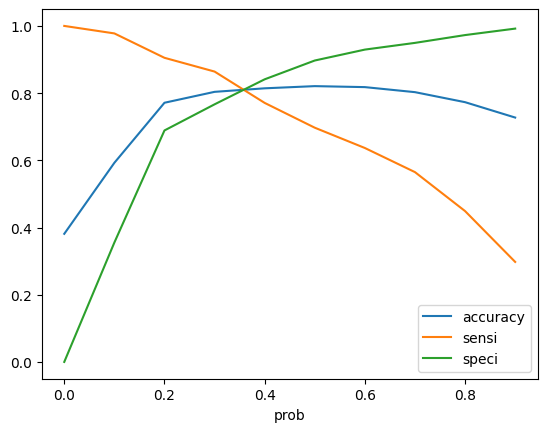

In [536]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

### Testing Model

In [537]:
X_test[['TotalVisits','Total Time Spent on Website', 'Page Views Per Visit']]  = scalar.transform(X_test[['TotalVisits','Total Time Spent on Website', 'Page Views Per Visit']])

In [538]:
col = X_train.columns

In [539]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Welingak Website,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Working Professional,Lead Profile_Other Leads,Lead Profile_Student of SomeSchool,Lead Profile_not provided,Last Notable Activity_Modified,Last Notable Activity_Unreachable
4269,0,0.444982,0,0,0,1,0,0,0,1,0,0
2376,0,0.000000,1,0,0,1,0,0,0,1,0,0
7766,0,0.025968,0,0,0,0,1,0,0,1,0,1
9199,0,0.000000,0,0,0,0,0,0,0,0,1,0
4359,0,0.000000,1,0,0,0,0,0,0,0,0,0


In [540]:
X_test_sm = sm.add_constant(X_test)


In [541]:
X_test_sm.shape

(2772, 13)

In [542]:
y_test_pred = res.predict(X_test_sm)

In [543]:
y_pred_1 = pd.DataFrame(y_test_pred)

In [544]:
y_test_df = pd.DataFrame(y_test)

In [545]:
y_test_df['CustID'] = y_test_df.index

In [546]:
# Removing index for both dataframes to append them side by side
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [547]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [548]:
y_pred_final.head()

,Converted,CustID,0
0,1,4269,0.701145
1,1,2376,0.891092
2,1,7766,0.829866
3,0,9199,0.210971
4,1,4359,0.929946


In [549]:
# Renaming the column
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [550]:
y_pred_final.head()

,Converted,CustID,Converted_Prob
0,1,4269,0.701145
1,1,2376,0.891092
2,1,7766,0.829866
3,0,9199,0.210971
4,1,4359,0.929946


In [551]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.4 else 0)

In [552]:
y_pred_final.head()

,Converted,CustID,Converted_Prob,final_predicted
0,1,4269,0.701145,1
1,1,2376,0.891092,1
2,1,7766,0.829866,1
3,0,9199,0.210971,0
4,1,4359,0.929946,1


In [553]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8207070707070707

In [554]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1443,  234],
       [ 263,  832]])

In [555]:
TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [556]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7598173515981735

In [557]:
# Let us calculate specificity
TN / float(TN+FP)

0.8604651162790697

### Conclusion

**Conclusion**

It was found that the variables that mattered the most in the potential buyers are (In descending order) :

**Don't email**

**The total time spend on the Website.**

**When the lead Orgin was**:
1. Lead Add Form

**When the lead Source**:
1. Lead Source_Welingak Website

**When the last activity was:**
1. Phone Conversation
2. SMS Sent


Keeping these in mind the X Education can flourish as they have a very high chance to get almost all the potential buyers to change their mind and buy their courses.